In [8]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import albumentations as A

### Images

In [9]:
images = glob("../../data/images/train/*.jpg")
labels = glob("../../data/labels/train/*.png")

### Transforms

In [3]:
crop = A.RandomCrop(width=720, height=720)
flip = A.HorizontalFlip(p=0.5)
transforms = A.Compose([crop, flip])

In [46]:
def display(index):
    global images, labels
    name = images[index].split("/")[-1].split(".")[0]
    in_image = cv2.imread(images[index])
    in_label = cv2.imread(labels[index])
    in_image = cv2.cvtColor(in_image, cv2.COLOR_BGR2RGB)
    output = transforms(image=in_image, mask=in_label)
    out_image, out_label = output['image'], output['mask']
    fig, ax = plt.subplots(1, 2, figsize=(15,8))
    ax[0].imshow(in_image)
    ax[0].imshow(in_label, alpha=0.5)
    ax[1].imshow(out_image)
    ax[1].imshow(out_label, alpha=0.5)
    ax[0].set_title(f'Original Image:{name}')
    ax[1].set_title(f'Transformed Image:{name}')
    return None

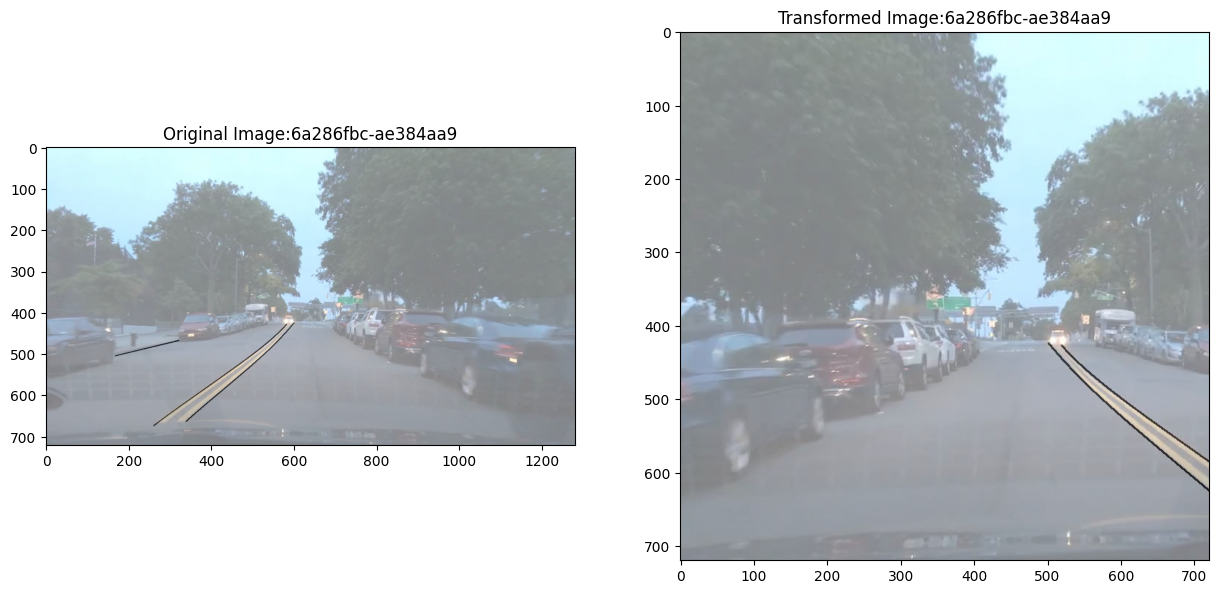

In [47]:
display(0)

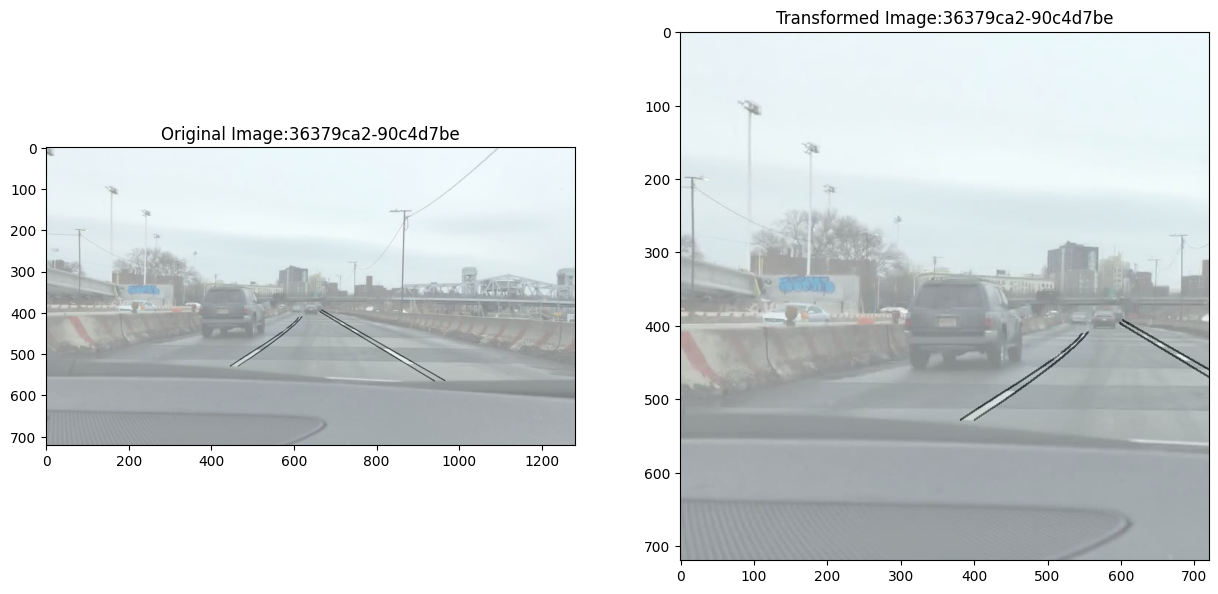

In [48]:
display(1)

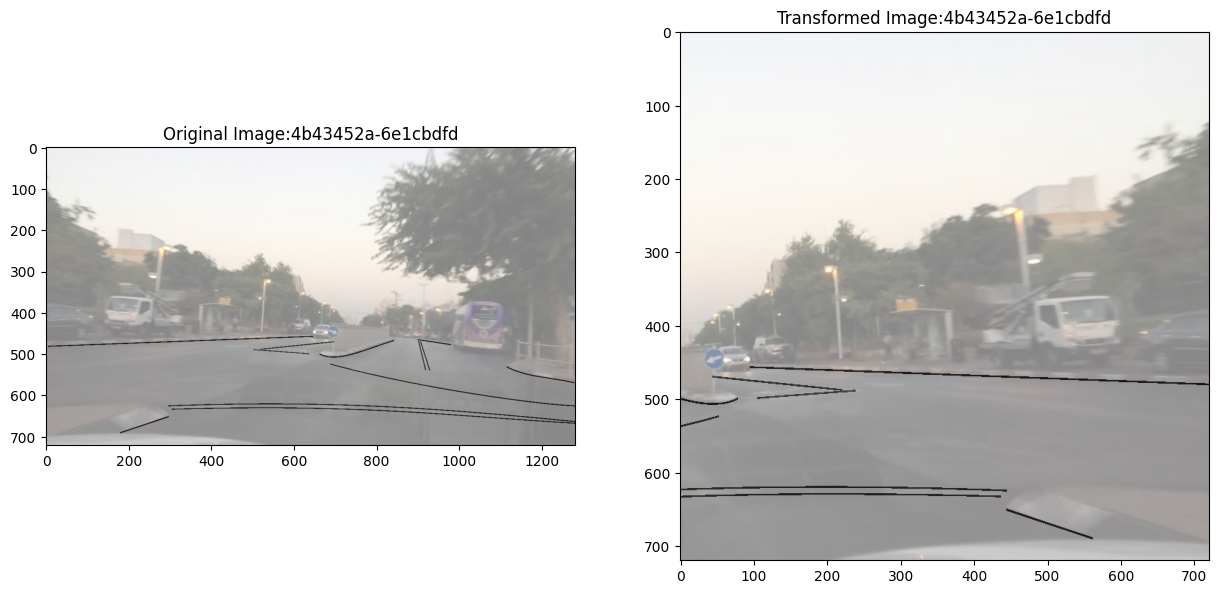

In [49]:
display(2)